## Data
"year" -->"Year (yyyy)"

"month" -->"Month (mm)"

"carrier" -->"Airline carrier abbreviation"

"carrier_name" -->"Airline carrier name"

"airport" -->"Airport Code"

"airport_name" -->"Airport Name"

"arr_flights" -->"Total number of arriving flights in the observation"

"arr_del15" -->"Total number of delayed flights in the observation"

"carrier_ct" "Number of flights delayed due to air carrier (subset ofarr_del15)"

"weather_ct"--> "Number of flights delayed due to weather (subset of arr_del15)"

"nas_ct"-->"Number of flights delayed due to National Aviation System (subset of arr_del15)"

"security_ct"--> "Number of flights delayed due to airport security (subset of arr_del15)"

"late_aircraft_ct"--> "Number of flights delayed due to a previous flight using the same aircraft being late"

"arr_cancelled" --> "Number of cancelled flights"

"arr_diverted" -->"Number of flights diverted"

"arr_delay"--> "Arrival delay in minutes"

"carrier_delay" -->"Carrier delay in minutes (subset of arr_delay)"

"weather_delay" -->"Weather delayed in minutes (subset of arr_delay)"

"nas_delay" --> "National Aviation System in minutes (subset of arr_delay)"

"security_delay" --> "Security delay in minutes (subset of arr_delay)"

"late_aircraft_delay" -->"Aircraft delay in minutes (subset of arr_delay)"

In [ ]:
 !sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=YGcAmhqbdXEZ3pl1bhphiwHJVgRWnKx63G7gvOv-1fY'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/MyDrive/Airline_Delay_Cause.csv"

ls: cannot access '/content/drive/MyDrive/Airline_Delay_Cause.csv': No such file or directory


In [ ]:
!pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 25.6 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 30.5 MB 1.7 MB/s 
     |████████████████████████████████| 6.3 MB 34.5 MB/s 


In [ ]:
!pip install airportsdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 28.7 MB/s 


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 20.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5273d0ea3e0c5b5955550c515b90da8ab5f2bf2e21291fa1af3631f62ba45265
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import numpy as np
import os,cv2,math,dlib,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import pandas as pd

import datetime
%matplotlib inline
import requests
import re
import airportsdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [ ]:
df = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [ ]:
df.isna().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [ ]:
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
column type,int64,int64,object,object,object,object,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,4,4,3,0,493,732,492,494,...,488,488,488,490,494,492,488,488,490,488
null values (%),0.0,0.0,0.001258,0.001258,0.000943,0.0,0.155023,0.230176,0.154709,0.155338,...,0.153451,0.153451,0.153451,0.15408,0.155338,0.154709,0.153451,0.153451,0.15408,0.153451


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

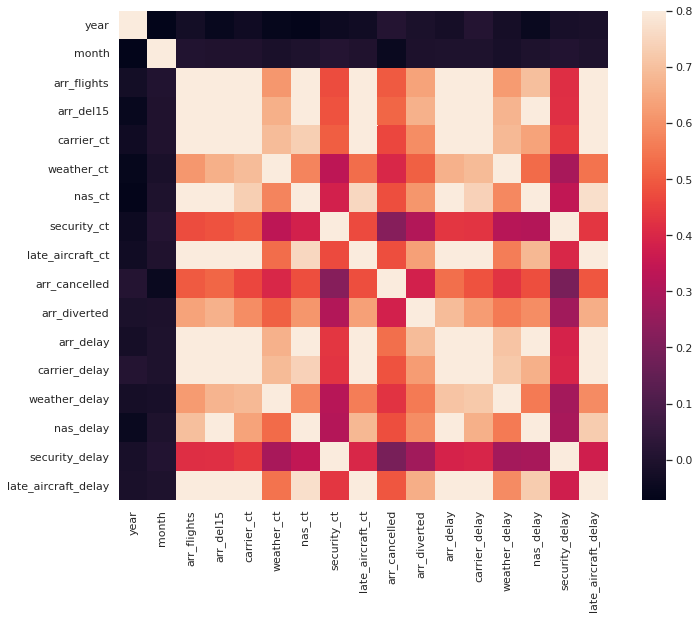

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [ ]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['arr_delay'] <= 15, 'Status'] = 0
    df.loc[df['arr_delay'] >= 15, 'Status'] = 1
    df.loc[df['arr_delay'] >= 60, 'Status'] = 2
    df.loc[df['arr_diverted'] == 1, 'Status'] = 3
    df.loc[df['arr_cancelled'] == 1, 'Status'] = 4

Exploratory Data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


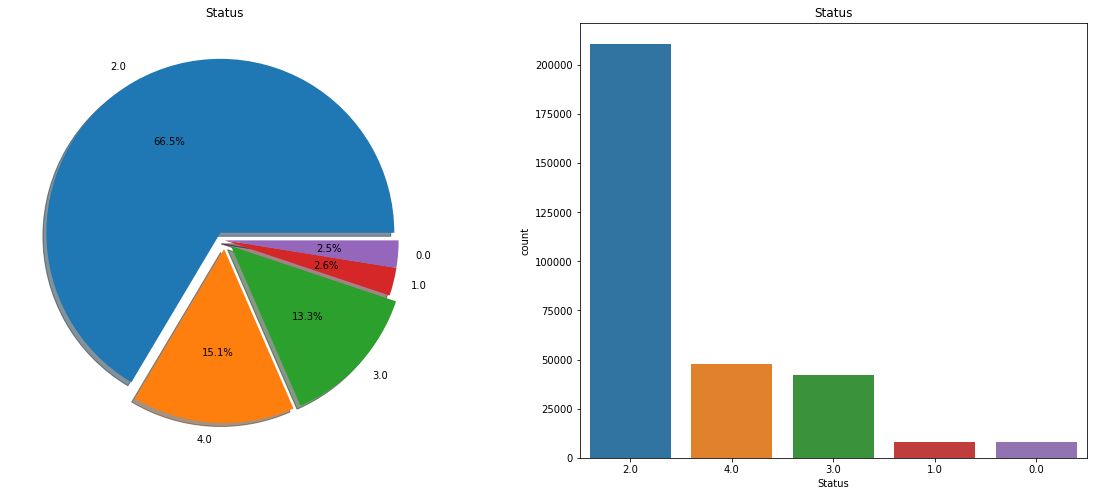

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['late_aircraft_ct'].groupby(df['airport']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
airport,,,,
CBM,0.0,0.00,1.0,0.000000
SKA,0.0,0.00,1.0,0.000000
MKC,0.0,0.00,1.0,0.000000
YNG,0.0,0.00,1.0,0.000000
RCA,0.0,0.00,1.0,0.000000
...,...,...,...,...
PIT,0.0,333.36,2946.0,17.681090
MCI,0.0,405.28,2963.0,24.167330
LAS,0.0,1303.39,2978.0,74.183153


In [ ]:
print("Nb of airports: {}".format(len(df['airport'].unique())))


Nb of airports: 418


In [ ]:
print(df['carrier'].value_counts().count())

29


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


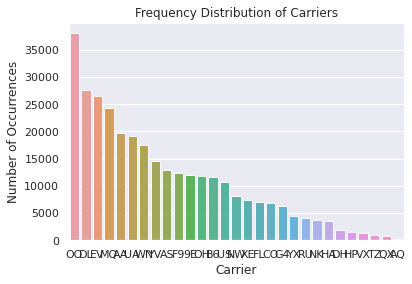

In [ ]:
carrier_count = df['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

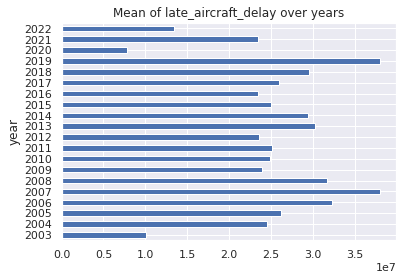

In [ ]:
df.groupby('year')['late_aircraft_delay'].sum().plot(kind='barh');
plt.title('Mean of late_aircraft_delay over years');

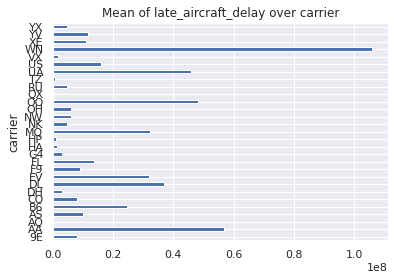

In [ ]:
df.groupby('carrier')['late_aircraft_delay'].sum().plot(kind='barh');
plt.title('Mean of late_aircraft_delay over carrier');

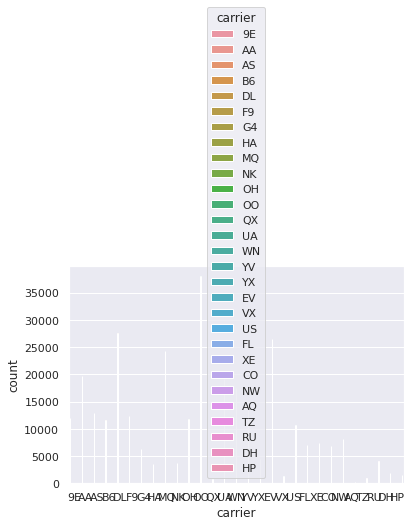

In [ ]:
sns.countplot(x='carrier',hue="carrier", data=df )

In [ ]:
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')
df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100
df_cancelled.sort_values(by=['proportion'], ascending=False).head()

,carrier_name,num_cancelled,num_arrived,proportion
16,ExpressJet Airlines LLC,8173.0,149209.0,5.477552
3,Allegiant Air,20861.0,464450.0,4.491549
14,Envoy Air,63664.0,1617456.0,3.936058
7,American Eagle Airlines Inc.,178233.0,5184027.0,3.438119
24,PSA Airlines Inc.,30774.0,919041.0,3.348490


In [ ]:
def find_season(month):
  season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
  return season_month_north.get(month)
season_list =[]
for month in df['month']:
    season = find_season(month)
    season_list.append(season)  

df['Season'] = season_list      

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Status,Season
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,2.0,Spring
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,2.0,Spring
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,4.0,Spring
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,2.0,Spring
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,2.0,Spring


In [ ]:
def quarter(x):
    if x <= 3:
        return(1)
    elif x <=6:
        return(2)
    elif x <= 9:
        return(3)
    else:
        return(4)   
df['Quarter']=df['month'].apply(quarter)        

In [ ]:
def Half(x):
    if x <= 6:
        return(1)
    else:
        return(2)   
df['Half']=df['month'].apply(Half) 

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Status,Season,Quarter,Half
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,255.0,222.0,0.0,4.0,0.0,29.0,2.0,Spring,2,1
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,884.0,351.0,0.0,81.0,0.0,452.0,2.0,Spring,2,1
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,138.0,4.0,0.0,106.0,0.0,28.0,4.0,Spring,2,1
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,947.0,585.0,35.0,125.0,0.0,202.0,2.0,Spring,2,1
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,808.0,662.0,0.0,87.0,0.0,59.0,2.0,Spring,2,1


In [ ]:
#carrier_delay ==>1 ,weather_delay==> 2 , nas_delay ==>3 , security_delay ==>4
x1=df['carrier_delay']
x2=df['weather_delay']
x3=df['nas_delay']
x4=df['security_delay']

df['most_mins']  = np.where((x1 >x2) & ( x1>x3) & (x1>x4) , 1,
                               (np.where((x2 >x1) & ( x2>x3) & (x2>x4) ,2,
                                     (np.where((x3 >x1) & ( x3>x2) & (x3>x4) ,3,        
                                           np.where((x4 >x1) & ( x4>x2) & (x4>x3) , 4,0))))))   
                                         
  

In [ ]:
#most delay reason
#carrier_ct ==>1 ,weather_ct ==>2 ,nas_ct ==>3 , security_ct ===>4
x1=df['carrier_ct']
x2=df['weather_ct']
x3=df['nas_ct']
x4=df['security_ct']

df['delay_reason']  = np.where((x1 >x2) & ( x1>x3) & (x1>x4) , 1,
                               (np.where((x2 >x1) & ( x2>x3) & (x2>x4) ,2,
                                     (np.where((x3 >x1) & ( x3>x2) & (x3>x4) ,3,        
                                           np.where((x4 >x1) & ( x4>x2) & (x4>x3) , 4,0))))))   

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,Status,Season,Quarter,Half,most_mins,delay_reason
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,4.0,0.0,29.0,2.0,Spring,2,1,1,1
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,81.0,0.0,452.0,2.0,Spring,2,1,1,1
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,106.0,0.0,28.0,4.0,Spring,2,1,3,3
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,35.0,125.0,0.0,202.0,2.0,Spring,2,1,1,1
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,87.0,0.0,59.0,2.0,Spring,2,1,1,1


In [ ]:
###############################
airports = airportsdata.load('IATA')  # key is IATA code
cities=[]
Countries=[]
for code in df['airport']: 
  if (code == 'LCK'):cities.append("Columbus"),Countries.append("US")
  elif (code == 'PGD'):cities.append("Punta Gorda"),Countries.append("US")
  elif (code == 'SCK'):cities.append("Stockton"),Countries.append("US")
  elif (code == 'CNY'):cities.append("Moab"),Countries.append("US")
  elif (code == 'ESC'):cities.append("Escanaba"),Countries.append("US")
  elif (code == 'HOB'): cities.append("Hobbs"),Countries.append("US")
  elif (code == 'RIW'):cities.append("Riverton"),Countries.append("US")
  elif (code == 'VEL'):cities.append("Vernal"),Countries.append("US")
  elif (code == 'WYS'):cities.append("West Yellowstone"),Countries.append("US")
  elif (code == 'CLD'):cities.append("Carlsbad")  ,Countries.append("US")
  elif (code == 'CIC'):cities.append("Chico") ,Countries.append("US")
  elif (code == 'UTM'):cities.append("Tunica")   ,Countries.append("US")
  elif (code == 'MWH'):cities.append("Moses Lake")  ,Countries.append("US")
  elif (code == 'UTM'):cities.append("Tunica")  ,Countries.append("US")
  elif (code == 'OXR'):cities.append("Ventura")  ,Countries.append("US")
  elif (code == 'PFN'):cities.append("Panama City")  ,Countries.append("US")
  elif (code == 'SLE'):cities.append("Salem")  ,Countries.append("US")
  elif (code == 'SOP'):cities.append("Pinehurst")  ,Countries.append("US")
  elif (code == 'MTH'):cities.append("Marathon")  ,Countries.append("US")
  elif (code == 'ISO'):cities.append("Kinston")  ,Countries.append("US")
  elif (code == 'VIS'):cities.append("Visalia")  ,Countries.append("US")
  elif (code == 'ILE'):cities.append("Ile Des Pins") ,Countries.append("US")
  elif (code == 'RCA'):cities.append("Rapid City")  ,Countries.append("US")
  elif (code == 'FMN'):cities.append("Farmington")  ,Countries.append("US")
  elif (code == 'EFD'):cities.append("Houston")   ,Countries.append("US")
  elif (code == 'SKA'):cities.append("Spokane")  ,Countries.append("US")
  elif (code == 'FNL'):cities.append("Loveland") ,  Countries.append("US")
  
  else:  
     cities.append(airports[code].get('city'))
     Countries.append(airports[code].get('country'))
   
df['City'] = cities  
df['Country'] = Countries  

In [ ]:
df['City'].duplicated().sum()

316869

In [ ]:
df['Country'].duplicated().sum()

317255

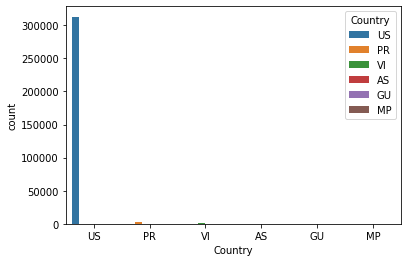

In [ ]:
sns.countplot(x='Country',hue="Country", data=df )

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_delay,late_aircraft_delay,Status,Season,Quarter,Half,most_mins,delay_reason,City,Country
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,29.0,2.0,Spring,2,1,1,1,Allentown,US
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,452.0,2.0,Spring,2,1,1,1,Albany,US
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,28.0,4.0,Spring,2,1,3,3,Nantucket,US
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,202.0,2.0,Spring,2,1,1,1,Alexandria,US
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,59.0,2.0,Spring,2,1,1,1,Augusta,US


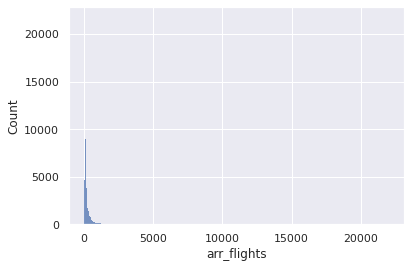

In [ ]:
sns.histplot(df['arr_flights'])

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary



RM_upper_limit, RM_lower_limit = find_skewed_boundaries(df, 'arr_del15', 1.5)
df['arr_del15']= np.where(df['arr_del15'] > RM_upper_limit, RM_upper_limit,
                       np.where(df['arr_del15'] < RM_lower_limit, RM_lower_limit,df['arr_del15']))  

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(df, 'arr_flights', 1.5)
df['arr_flights']= np.where(df['arr_flights'] > RM_upper_limit, RM_upper_limit,
                       np.where(df['arr_flights'] < RM_lower_limit, RM_lower_limit,df['arr_flights']))      



In [ ]:
df['State']=df['airport_name'].str.split(",",expand=True)[1].str.split(":",expand=True)[0]

In [ ]:
df['State']= df['State'].str.replace('AK', 'Alaska')
df['State']= df['State'].str.replace('AL', 'Alabama')
df['State']= df['State'].str.replace('AR', 'Arkansas')
df['State']= df['State'].str.replace('AS', 'American Samoa')
df['State']= df['State'].str.replace('AZ', 'Arizona')
df['State']= df['State'].str.replace('CA', 'California')
df['State']= df['State'].str.replace('CO', 'Colorado')
df['State']= df['State'].str.replace('CT', 'Connecticut')
df['State']= df['State'].str.replace('DC', 'District of Columbia')
df['State']= df['State'].str.replace('DE', 'Delaware')
df['State']= df['State'].str.replace('FL', 'Florida')
df['State']= df['State'].str.replace('GA', 'Georgia')
df['State']= df['State'].str.replace('GU', 'Guam')
df['State']= df['State'].str.replace('HI', 'Hawaii')
df['State']= df['State'].str.replace('IA', 'Iowa')
df['State']= df['State'].str.replace('ID', 'Idaho')
df['State']= df['State'].str.replace('IL', 'Illinois')
df['State']= df['State'].str.replace('IN', 'Indiana')
df['State']= df['State'].str.replace('KS', 'Kansas')
df['State']= df['State'].str.replace('KY', 'Kentucky')
df['State']= df['State'].str.replace('LA', 'Louisiana')
df['State']= df['State'].str.replace('MA', 'Massachusetts')
df['State']= df['State'].str.replace('MD', 'Maryland')
df['State']= df['State'].str.replace('ME', 'Maine')
df['State']= df['State'].str.replace('MI', 'Michigan')
df['State']= df['State'].str.replace('MN', 'Minnesota')
df['State']= df['State'].str.replace('MO', 'Missouri')
df['State']= df['State'].str.replace('MP', 'Northern Mariana Islands')
df['State']= df['State'].str.replace('MS', 'Mississippi')
df['State']= df['State'].str.replace('MT', 'Montana')
df['State']= df['State'].str.replace('NA', 'National')
df['State']= df['State'].str.replace('NC', 'North Carolina')
df['State']= df['State'].str.replace('ND', 'North Dakota')
df['State']= df['State'].str.replace('NE', 'Nebraska')
df['State']= df['State'].str.replace('NH', 'New Hampshire')
df['State']= df['State'].str.replace('NJ', 'New Jersey')
df['State']= df['State'].str.replace('NM', 'New Mexico')
df['State']= df['State'].str.replace('NV', 'Nevada')
df['State']= df['State'].str.replace('NY', 'New York')
df['State']= df['State'].str.replace('OH', 'Ohio')
df['State']= df['State'].str.replace('OK', 'Oklahoma')
df['State']= df['State'].str.replace('OR', 'Oregon')
df['State']= df['State'].str.replace('PA', 'Pennsylvania')
df['State']= df['State'].str.replace('PR', 'Puerto Rico')
df['State']= df['State'].str.replace('RI', 'Rhode Island')
df['State']= df['State'].str.replace('SC', 'South Carolina')
df['State']= df['State'].str.replace('SD', 'South Dakota')
df['State']= df['State'].str.replace('TN', 'Tennessee')
df['State']= df['State'].str.replace('TX', 'Texas')
df['State']= df['State'].str.replace('UT', 'Utah')
df['State']= df['State'].str.replace('VA', 'Virginia')
df['State']= df['State'].str.replace('VI', 'Virgin Islands')
df['State']= df['State'].str.replace('VT', 'Vermont')
df['State']= df['State'].str.replace('WA', 'Washington')
df['State']= df['State'].str.replace('WI', 'Wisconsin')
df['State']= df['State'].str.replace('WV', 'West Virginia')
df['State']= df['State'].str.replace('WY', 'Wyoming')
df['State']= df['State'].str.replace('TT', 'Trust Territories')

# **Which year records the most delay Events?**

In [ ]:
df.groupby('year')['airport'].count().sort_values(ascending=False)

year
2019    20927
2021    19929
2007    19485
2008    18885
2020    18594
2006    18062
2009    17637
2010    17554
2018    17104
2005    16999
2004    16689
2013    16068
2011    15562
2012    14366
2014    13957
2015    13513
2017    12503
2016    12195
2003     8757
2022     8475
Name: airport, dtype: int64

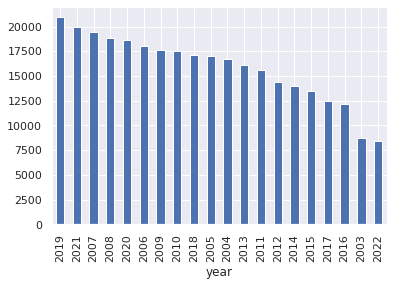

In [ ]:
df.groupby('year')['airport'].count().sort_values(ascending=False).plot(kind='bar')

# Which **Half_Year** records the most delay Events?

In [ ]:
df.groupby('Half')['airport'].count().sort_values(ascending=False)

Half
1    158656
2    158605
Name: airport, dtype: int64

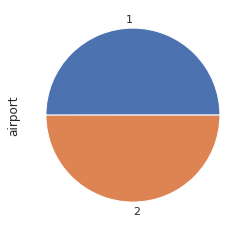

In [ ]:
df.groupby('Half')['airport'].count().sort_values(ascending=False).plot(kind='pie')

# Which Quarter_Year records the most delay Events?

In [ ]:
df.groupby('Quarter')['airport'].count().sort_values(ascending=False)

Quarter
1    79667
4    79361
3    79244
2    78989
Name: airport, dtype: int64

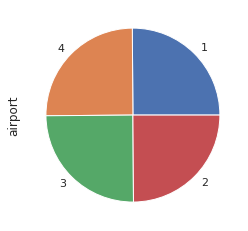

In [ ]:
df.groupby('Quarter')['airport'].count().sort_values(ascending=False).plot(kind='pie')

# Which Month records the most delay Events?

In [ ]:
df.groupby('month')['airport'].count().sort_values(ascending=False)

month
1     26852
12    26739
9     26630
8     26565
4     26519
3     26491
11    26371
2     26324
6     26268
10    26251
5     26202
7     26049
Name: airport, dtype: int64

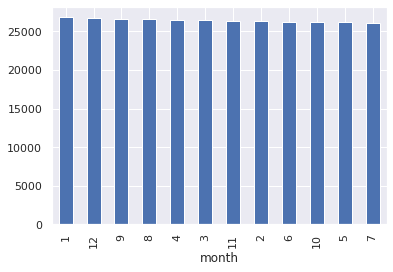

In [ ]:
df.groupby('month')['airport'].count().sort_values(ascending=False).plot(kind='bar')

# Which Season records the most delay Events?

In [ ]:
df.groupby('Season')['airport'].count().sort_values(ascending=False)

Season
Winter    79915
Autumn    79252
Spring    79212
Summer    78882
Name: airport, dtype: int64

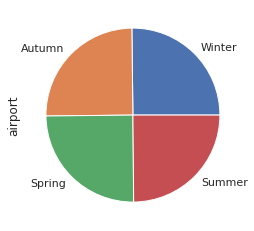

In [ ]:
df.groupby('Season')['airport'].count().sort_values(ascending=False).plot(kind='pie')

# Which Carrier records the most delay Events?

In [ ]:
df.groupby('carrier_name')['airport'].count().sort_values(ascending=False)

carrier_name
SkyWest Airlines Inc.           38038
Delta Air Lines Inc.            27518
ExpressJet Airlines Inc.        24487
American Airlines Inc.          19770
United Air Lines Inc.           19096
Southwest Airlines Co.          17576
American Eagle Airlines Inc.    15399
Mesa Airlines Inc.              14483
Alaska Airlines Inc.            12933
Frontier Airlines Inc.          12275
Atlantic Southeast Airlines     12158
JetBlue Airways                 11572
US Airways Inc.                 10692
Envoy Air                        8979
Northwest Airlines Inc.          8061
Comair Inc.                      7685
AirTran Airways Corporation      6955
Continental Air Lines Inc.       6908
Pinnacle Airlines Inc.           6434
Allegiant Air                    6369
Endeavor Air Inc.                5509
Republic Airline                 4425
PSA Airlines Inc.                4217
Spirit Air Lines                 3788
Hawaiian Airlines Inc.           3579
America West Airlines Inc.       1579

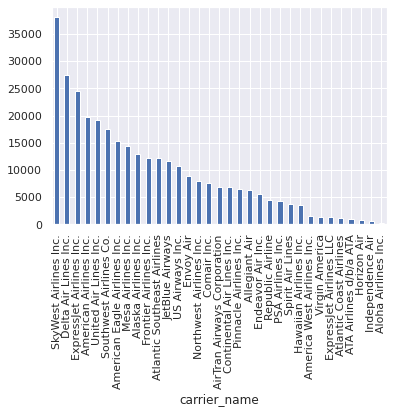

In [ ]:
df.groupby('carrier_name')['airport'].count().sort_values(ascending=False).plot(kind='bar')

## Which Airport records the most delay Events?

In [ ]:
df.groupby('airport_name')['airport'].count().sort_values(ascending=False).head(20)

airport_name
Detroit, MI: Detroit Metro Wayne County                       3022
Los Angeles, CA: Los Angeles International                    2988
Las Vegas, NV: McCarran International                         2978
Kansas City, MO: Kansas City International                    2963
Pittsburgh, PA: Pittsburgh International                      2946
Raleigh/Durham, NC: Raleigh-Durham International              2937
Atlanta, GA: Hartsfield-Jackson Atlanta International         2932
Phoenix, AZ: Phoenix Sky Harbor International                 2932
Washington, DC: Ronald Reagan Washington National             2931
Boston, MA: Logan International                               2914
Indianapolis, IN: Indianapolis International                  2912
New Orleans, LA: Louis Armstrong New Orleans International    2907
San Diego, CA: San Diego International                        2897
Austin, TX: Austin - Bergstrom International                  2894
Dallas/Fort Worth, TX: Dallas/Fort Worth Internat

# Which State records the most delay Events?

In [ ]:
df.groupby('State')['airport'].count().sort_values(ascending=False)

State
 California              28487
 Florida                 24530
 Texas                   23344
 New York                16252
 Ohio                    10498
 North Carolina           9947
 Michigan                 9840
 Pennsylvania             9802
 Colorado                 8245
 Tennessee                7906
 Illinois                 7651
 Missouri                 7106
 Louisiana                7029
 Wisconsin                6787
 Virginia                 6665
 Hawaii                   6261
 Georgia                  6236
 South Carolina           6163
 Arizona                  5695
 District of Columbia     5565
 Indiana                  5341
 Alaska                   5266
 Washington               5122
 Nevada                   5115
 Alabama                  4949
 Oklahoma                 4693
 Minnesota                4339
 Montana                  4206
 Oregon                   3970
 Arkansas                 3780
 Iowa                     3734
 Kentucky                 3530
 N

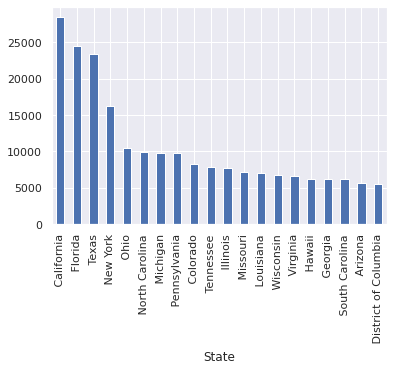

In [ ]:
df.groupby('State')['airport'].count().sort_values(ascending=False).head(20).plot(kind='bar')

# **How many minutes that air planes delayed in each Carrier?**

In [ ]:
df.groupby('carrier_name')['most_mins'].sum().sort_values(ascending=False)

carrier_name
SkyWest Airlines Inc.           47570
Delta Air Lines Inc.            39657
ExpressJet Airlines Inc.        38620
United Air Lines Inc.           28928
American Airlines Inc.          26579
American Eagle Airlines Inc.    24122
Frontier Airlines Inc.          23167
Alaska Airlines Inc.            21222
Southwest Airlines Co.          20451
JetBlue Airways                 18399
US Airways Inc.                 18386
Mesa Airlines Inc.              17555
Envoy Air                       16339
Atlantic Southeast Airlines     15270
Continental Air Lines Inc.      14598
AirTran Airways Corporation     13322
Northwest Airlines Inc.         12909
Comair Inc.                     11929
Pinnacle Airlines Inc.           9334
Allegiant Air                    9065
Spirit Air Lines                 8740
Endeavor Air Inc.                8097
Republic Airline                 7545
PSA Airlines Inc.                6263
Hawaiian Airlines Inc.           3580
Virgin America                   2726

# **How many minutes that air planes delayed in each State?**

In [ ]:
df.groupby('State')['most_mins'].sum().sort_values(ascending=False)

State
 California              41691
 Florida                 38072
 Texas                   35299
 New York                28124
 Pennsylvania            16225
 Ohio                    14812
 North Carolina          14389
 Illinois                14374
 Michigan                13906
 Colorado                12123
 Tennessee               11162
 Georgia                 10285
 Louisiana               10164
 Missouri                10019
 District of Columbia     9728
 Wisconsin                9627
 Virginia                 9075
 Hawaii                   8526
 South Carolina           8509
 Arizona                  8072
 Alaska                   8040
 New Jersey               7930
 Nevada                   7625
 Washington               7367
 Indiana                  7347
 Alabama                  6820
 Minnesota                6756
 Massachusetts            6694
 Oklahoma                 6445
 Montana                  5729
 Iowa                     5332
 Oregon                   5238
 A

# **How many minutes that air planes delayed in each Year?**

In [ ]:
df.groupby('year')['most_mins'].sum().sort_values(ascending=False)

year
2019    31392
2008    29605
2007    29156
2004    29065
2006    28307
2009    28095
2021    27475
2005    27435
2018    25784
2010    25311
2020    25245
2013    23685
2011    22766
2014    20448
2012    20305
2015    19393
2017    17858
2016    16944
2003    15998
2022    11205
Name: most_mins, dtype: int64

# **How many minutes that air planes delayed in each Half_Year?**

In [ ]:
df.groupby('Half')['most_mins'].sum().sort_values(ascending=False)

Half
1    239000
2    236472
Name: most_mins, dtype: int64

# **How many minutes that air planes delayed in each Quarter_Year?**

In [ ]:
df.groupby('Quarter')['most_mins'].sum().sort_values(ascending=False)

Quarter
1    120659
4    118544
2    118341
3    117928
Name: most_mins, dtype: int64

# **How many minutes that air planes delayed in each Month?**

In [ ]:
df.groupby('month')['most_mins'].sum().sort_values(ascending=False)

month
2     40974
1     40916
6     40147
12    39679
9     39604
11    39529
8     39489
10    39336
5     39218
4     38976
7     38835
3     38769
Name: most_mins, dtype: int64

# **Details of Aircrafts Delays by Carriers**

In [ ]:
df.groupby('carrier_name')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
carrier_name,,,,,
Southwest Airlines Co.,22053649.0,4053401.0,2029785.81,339192.0,42281.0
Delta Air Lines Inc.,13690394.0,2179117.0,579733.20,156693.0,26685.0
American Airlines Inc.,12971636.0,2609248.0,798179.58,265038.0,36421.0
SkyWest Airlines Inc.,11454934.0,1984694.0,741443.17,239172.0,28630.0
United Air Lines Inc.,9254401.0,1814691.0,588636.37,147098.0,20909.0
ExpressJet Airlines Inc.,7113659.0,1529090.0,555661.17,191983.0,22291.0
US Airways Inc.,5188611.0,997160.0,271859.01,76464.0,9194.0
American Eagle Airlines Inc.,5184027.0,1129056.0,423714.60,178233.0,11900.0
JetBlue Airways,4026148.0,953367.0,319664.21,74427.0,11747.0


# **Details of Aircrafts Delays by States**

In [ ]:
df.groupby('State')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
State,,,,,
California,14277807.0,2753913.0,1036297.80,214872.0,24332.0
Texas,13496554.0,2455972.0,952217.94,270970.0,45827.0
Florida,8888362.0,1784502.0,579561.53,132838.0,19983.0
Illinois,7790917.0,1624513.0,560247.59,231006.0,20872.0
Georgia,7634376.0,1410804.0,430958.82,123642.0,15686.0
New York,5526226.0,1290493.0,353054.90,159769.0,20558.0
Colorado,4811370.0,860425.0,307297.10,82322.0,14266.0
North Carolina,4013849.0,708752.0,235486.72,81564.0,6861.0
Arizona,3771589.0,624710.0,235206.27,46832.0,5165.0


# **Details of Aircrafts Delays by Years**

In [ ]:
df.groupby('year')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
year,,,,,
2007,7455458.0,1804028.0,607928.25,160809.0,17182.0
2019,7422029.0,1389253.0,512965.20,134918.0,18879.0
2006,7141922.0,1615537.0,528966.06,121934.0,16186.0
2005,7139339.0,1465586.0,442946.57,133688.0,14021.0
2004,7129270.0,1421391.0,420421.50,127757.0,13784.0
2008,7009706.0,1524735.0,503380.72,137429.0,17248.0
2009,6450279.0,1218288.0,399709.18,89372.0,15462.0
2010,6450109.0,1174884.0,420272.65,113247.0,15474.0
2013,6369481.0,1269277.0,492086.83,96012.0,14159.0


# **Details of Aircrafts Delays by Half_Years**

In [ ]:
df.groupby('Half')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
Half,,,,,
2,61419595.0,11526740.0,3952846.71,897479.0,136330.0
1,59795376.0,11603995.0,3977476.77,1388901.0,139123.0


# **Details of Aircrafts Delays by Quarter_Years**

In [ ]:
df.groupby('Quarter')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
Quarter,,,,,
3,31207977.0,5952035.0,2068832.81,478741.0,79556.0
4,30211618.0,5574705.0,1884013.90,418738.0,56774.0
2,30158341.0,5920375.0,2072861.15,554760.0,76755.0
1,29637035.0,5683620.0,1904615.62,834141.0,62368.0


# **Details of Aircrafts Delays by Seasons**

In [ ]:
df.groupby('Season')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
Season,,,,,
Summer,31531516.0,6840827.0,2446791.55,502834.0,93836.0
Spring,30521846.0,5546376.0,1915255.27,676791.0,64837.0
Autumn,29952756.0,4677500.0,1523159.45,339663.0,50508.0
Winter,29208853.0,6066032.0,2045117.21,767092.0,66272.0


# **Details of Aircrafts Delays by Months**

In [ ]:
df.groupby('month')['arr_flights','arr_del15','late_aircraft_ct','arr_cancelled','arr_diverted'].sum().sort_values(by='arr_flights',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arr_flights,arr_del15,late_aircraft_ct,arr_cancelled,arr_diverted
month,,,,,
8,10706237.0,2150638.0,756845.37,173992.0,28934.0
7,10662028.0,2367049.0,855679.73,168751.0,32812.0
3,10526756.0,1949141.0,676660.57,282122.0,20172.0
10,10283949.0,1686899.0,560048.50,115359.0,16759.0
6,10163251.0,2323140.0,834266.45,160091.0,32090.0
12,10098574.0,2331553.0,817162.16,215073.0,24076.0
5,10057300.0,1862005.0,640088.60,133682.0,25037.0
1,9954693.0,1930267.0,629785.17,281994.0,22482.0
4,9937790.0,1735230.0,598506.10,260987.0,19628.0


# **Tabel of Carriers delays Over Years**

In [ ]:
delay_2022=df[df['year']==2022].groupby('carrier_name')['airport'].count().to_frame()
delay_2021=df[df['year']==2021].groupby('carrier_name')['airport'].count().to_frame()
delay_2020=df[df['year']==2020].groupby('carrier_name')['airport'].count().to_frame()
delay_2019=df[df['year']==2019].groupby('carrier_name')['airport'].count().to_frame()
delay_2018=df[df['year']==2018].groupby('carrier_name')['airport'].count().to_frame()
delay_2017=df[df['year']==2017].groupby('carrier_name')['airport'].count().to_frame()
delay_2016=df[df['year']==2016].groupby('carrier_name')['airport'].count().to_frame()
delay_2015=df[df['year']==2015].groupby('carrier_name')['airport'].count().to_frame()
delay_2014=df[df['year']==2014].groupby('carrier_name')['airport'].count().to_frame()
delay_2013=df[df['year']==2013].groupby('carrier_name')['airport'].count().to_frame()
delay_2012=df[df['year']==2012].groupby('carrier_name')['airport'].count().to_frame()
delay_2011=df[df['year']==2011].groupby('carrier_name')['airport'].count().to_frame()
delay_2010=df[df['year']==2010].groupby('carrier_name')['airport'].count().to_frame()
delay_2009=df[df['year']==2009].groupby('carrier_name')['airport'].count().to_frame()
delay_2008=df[df['year']==2008].groupby('carrier_name')['airport'].count().to_frame()
delay_2007=df[df['year']==2007].groupby('carrier_name')['airport'].count().to_frame()
delay_2006=df[df['year']==2006].groupby('carrier_name')['airport'].count().to_frame()
delay_2005=df[df['year']==2005].groupby('carrier_name')['airport'].count().to_frame()
delay_2004=df[df['year']==2004].groupby('carrier_name')['airport'].count().to_frame()
delay_2003=df[df['year']==2003].groupby('carrier_name')['airport'].count().to_frame()
delay_2022.rename(columns = {'airport':'2022'}, inplace = True)
delay_2021.rename(columns = {'airport':'2021'}, inplace = True)
delay_2020.rename(columns = {'airport':'2020'}, inplace = True)
delay_2019.rename(columns = {'airport':'2019'}, inplace = True)
delay_2018.rename(columns = {'airport':'2018'}, inplace = True)
delay_2017.rename(columns = {'airport':'2017'}, inplace = True)
delay_2016.rename(columns = {'airport':'2016'}, inplace = True)
delay_2015.rename(columns = {'airport':'2015'}, inplace = True)
delay_2014.rename(columns = {'airport':'2014'}, inplace = True)
delay_2013.rename(columns = {'airport':'2013'}, inplace = True)
delay_2012.rename(columns = {'airport':'2012'}, inplace = True)
delay_2011.rename(columns = {'airport':'2011'}, inplace = True)
delay_2010.rename(columns = {'airport':'2010'}, inplace = True)
delay_2009.rename(columns = {'airport':'2009'}, inplace = True)
delay_2008.rename(columns = {'airport':'2008'}, inplace = True)
delay_2007.rename(columns = {'airport':'2007'}, inplace = True)
delay_2006.rename(columns = {'airport':'2006'}, inplace = True)
delay_2005.rename(columns = {'airport':'2005'}, inplace = True)
delay_2004.rename(columns = {'airport':'2004'}, inplace = True)
delay_2003.rename(columns = {'airport':'2003'}, inplace = True)
delay_2020
from functools import reduce
dfl=[delay_2003, delay_2004,delay_2005,delay_2006,delay_2007,delay_2008,delay_2009,delay_2010,
     delay_2011,delay_2012,delay_2013,delay_2014,delay_2015,delay_2016,delay_2017,delay_2018,
     delay_2019,delay_2020,delay_2021,delay_2022]
delay = reduce(lambda  left,right: pd.merge(left,right,on=['carrier_name'],
                                            how='outer'), dfl)
delay.fillna(0)

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
carrier_name,,,,,,,,,,,,,,,,,,,,
ATA Airlines d/b/a ATA,196.0,321.0,239.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AirTran Airways Corporation,268.0,482.0,536.0,574.0,637.0,672.0,703.0,770.0,760.0,655.0,498.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alaska Airlines Inc.,320.0,545.0,545.0,549.0,543.0,550.0,579.0,601.0,609.0,631.0,654.0,683.0,737.0,779.0,805.0,844.0,865.0,805.0,900.0,389.0
America West Airlines Inc.,358.0,611.0,610.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Airlines Inc.,603.0,1006.0,997.0,968.0,941.0,932.0,919.0,926.0,949.0,962.0,975.0,997.0,1006.0,1103.0,1148.0,1174.0,1256.0,1156.0,1221.0,531.0
American Eagle Airlines Inc.,680.0,1268.0,1262.0,1377.0,1391.0,1362.0,1358.0,1499.0,1601.0,1643.0,1561.0,397.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atlantic Coast Airlines,579.0,674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atlantic Southeast Airlines,687.0,1223.0,1421.0,1659.0,1635.0,1461.0,1284.0,1349.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Continental Air Lines Inc.,566.0,937.0,894.0,854.0,858.0,762.0,691.0,660.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Tabel of States delays Over Years**

In [ ]:
delay_2022=df[df['year']==2022].groupby('State')['airport'].count().to_frame()
delay_2021=df[df['year']==2021].groupby('State')['airport'].count().to_frame()
delay_2020=df[df['year']==2020].groupby('State')['airport'].count().to_frame()
delay_2019=df[df['year']==2019].groupby('State')['airport'].count().to_frame()
delay_2018=df[df['year']==2018].groupby('State')['airport'].count().to_frame()
delay_2017=df[df['year']==2017].groupby('State')['airport'].count().to_frame()
delay_2016=df[df['year']==2016].groupby('State')['airport'].count().to_frame()
delay_2015=df[df['year']==2015].groupby('State')['airport'].count().to_frame()
delay_2014=df[df['year']==2014].groupby('State')['airport'].count().to_frame()
delay_2013=df[df['year']==2013].groupby('State')['airport'].count().to_frame()
delay_2012=df[df['year']==2012].groupby('State')['airport'].count().to_frame()
delay_2011=df[df['year']==2011].groupby('State')['airport'].count().to_frame()
delay_2010=df[df['year']==2010].groupby('State')['airport'].count().to_frame()
delay_2009=df[df['year']==2009].groupby('State')['airport'].count().to_frame()
delay_2008=df[df['year']==2008].groupby('State')['airport'].count().to_frame()
delay_2007=df[df['year']==2007].groupby('State')['airport'].count().to_frame()
delay_2006=df[df['year']==2006].groupby('State')['airport'].count().to_frame()
delay_2005=df[df['year']==2005].groupby('State')['airport'].count().to_frame()
delay_2004=df[df['year']==2004].groupby('State')['airport'].count().to_frame()
delay_2003=df[df['year']==2003].groupby('State')['airport'].count().to_frame()
delay_2022.rename(columns = {'airport':'2022'}, inplace = True)
delay_2021.rename(columns = {'airport':'2021'}, inplace = True)
delay_2020.rename(columns = {'airport':'2020'}, inplace = True)
delay_2019.rename(columns = {'airport':'2019'}, inplace = True)
delay_2018.rename(columns = {'airport':'2018'}, inplace = True)
delay_2017.rename(columns = {'airport':'2017'}, inplace = True)
delay_2016.rename(columns = {'airport':'2016'}, inplace = True)
delay_2015.rename(columns = {'airport':'2015'}, inplace = True)
delay_2014.rename(columns = {'airport':'2014'}, inplace = True)
delay_2013.rename(columns = {'airport':'2013'}, inplace = True)
delay_2012.rename(columns = {'airport':'2012'}, inplace = True)
delay_2011.rename(columns = {'airport':'2011'}, inplace = True)
delay_2010.rename(columns = {'airport':'2010'}, inplace = True)
delay_2009.rename(columns = {'airport':'2009'}, inplace = True)
delay_2008.rename(columns = {'airport':'2008'}, inplace = True)
delay_2007.rename(columns = {'airport':'2007'}, inplace = True)
delay_2006.rename(columns = {'airport':'2006'}, inplace = True)
delay_2005.rename(columns = {'airport':'2005'}, inplace = True)
delay_2004.rename(columns = {'airport':'2004'}, inplace = True)
delay_2003.rename(columns = {'airport':'2003'}, inplace = True)
delay_2020
from functools import reduce
dfl=[delay_2003, delay_2004,delay_2005,delay_2006,delay_2007,delay_2008,delay_2009,delay_2010,
     delay_2011,delay_2012,delay_2013,delay_2014,delay_2015,delay_2016,delay_2017,delay_2018,
     delay_2019,delay_2020,delay_2021,delay_2022]
delay = reduce(lambda  left,right: pd.merge(left,right,on=['State'],
                                            how='outer'), dfl)
delay.fillna(0)

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,
Alabama,128.0,254.0,278.0,290.0,355.0,355.0,320.0,317.0,265.0,216.0,233,194,177,131.0,153.0,224.0,355.0,295.0,286,123
Alaska,173.0,288.0,301.0,299.0,290.0,282.0,263.0,263.0,263.0,265.0,272,270,269,265.0,257.0,255.0,271.0,265.0,336,119
Arizona,160.0,302.0,305.0,359.0,367.0,365.0,347.0,326.0,337.0,307.0,273,231,232,226.0,235.0,251.0,307.0,292.0,340,133
Arkansas,99.0,211.0,194.0,189.0,223.0,226.0,200.0,216.0,178.0,178.0,206,175,151,112.0,107.0,217.0,303.0,254.0,239,102
California,867.0,1599.0,1715.0,1888.0,1933.0,1830.0,1648.0,1568.0,1551.0,1474.0,1405,1251,1122,1081.0,1141.0,1315.0,1480.0,1299.0,1628,692
Colorado,200.0,399.0,429.0,526.0,549.0,511.0,457.0,447.0,466.0,424.0,422,406,374,339.0,317.0,419.0,451.0,417.0,469,223
Connecticut,77.0,141.0,155.0,135.0,162.0,162.0,135.0,130.0,120.0,109.0,129,114,99,84.0,93.0,131.0,169.0,159.0,160,60
District of Columbia,185.0,355.0,355.0,332.0,341.0,317.0,309.0,302.0,291.0,256.0,283,256,253,238.0,235.0,282.0,296.0,272.0,286,121
Florida,754.0,1457.0,1495.0,1443.0,1526.0,1476.0,1332.0,1262.0,1185.0,1097.0,1176,1084,1022,913.0,897.0,1207.0,1493.0,1446.0,1588,677


# **Tabel of Airports delays Over Years**

In [ ]:
delay_2022=df[df['year']==2022].groupby('airport_name')['airport'].count().to_frame()
delay_2021=df[df['year']==2021].groupby('airport_name')['airport'].count().to_frame()
delay_2020=df[df['year']==2020].groupby('airport_name')['airport'].count().to_frame()
delay_2019=df[df['year']==2019].groupby('airport_name')['airport'].count().to_frame()
delay_2018=df[df['year']==2018].groupby('airport_name')['airport'].count().to_frame()
delay_2017=df[df['year']==2017].groupby('airport_name')['airport'].count().to_frame()
delay_2016=df[df['year']==2016].groupby('airport_name')['airport'].count().to_frame()
delay_2015=df[df['year']==2015].groupby('airport_name')['airport'].count().to_frame()
delay_2014=df[df['year']==2014].groupby('airport_name')['airport'].count().to_frame()
delay_2013=df[df['year']==2013].groupby('airport_name')['airport'].count().to_frame()
delay_2012=df[df['year']==2012].groupby('airport_name')['airport'].count().to_frame()
delay_2011=df[df['year']==2011].groupby('airport_name')['airport'].count().to_frame()
delay_2010=df[df['year']==2010].groupby('airport_name')['airport'].count().to_frame()
delay_2009=df[df['year']==2009].groupby('airport_name')['airport'].count().to_frame()
delay_2008=df[df['year']==2008].groupby('airport_name')['airport'].count().to_frame()
delay_2007=df[df['year']==2007].groupby('airport_name')['airport'].count().to_frame()
delay_2006=df[df['year']==2006].groupby('airport_name')['airport'].count().to_frame()
delay_2005=df[df['year']==2005].groupby('airport_name')['airport'].count().to_frame()
delay_2004=df[df['year']==2004].groupby('airport_name')['airport'].count().to_frame()
delay_2003=df[df['year']==2003].groupby('airport_name')['airport'].count().to_frame()
delay_2022.rename(columns = {'airport':'2022'}, inplace = True)
delay_2021.rename(columns = {'airport':'2021'}, inplace = True)
delay_2020.rename(columns = {'airport':'2020'}, inplace = True)
delay_2019.rename(columns = {'airport':'2019'}, inplace = True)
delay_2018.rename(columns = {'airport':'2018'}, inplace = True)
delay_2017.rename(columns = {'airport':'2017'}, inplace = True)
delay_2016.rename(columns = {'airport':'2016'}, inplace = True)
delay_2015.rename(columns = {'airport':'2015'}, inplace = True)
delay_2014.rename(columns = {'airport':'2014'}, inplace = True)
delay_2013.rename(columns = {'airport':'2013'}, inplace = True)
delay_2012.rename(columns = {'airport':'2012'}, inplace = True)
delay_2011.rename(columns = {'airport':'2011'}, inplace = True)
delay_2010.rename(columns = {'airport':'2010'}, inplace = True)
delay_2009.rename(columns = {'airport':'2009'}, inplace = True)
delay_2008.rename(columns = {'airport':'2008'}, inplace = True)
delay_2007.rename(columns = {'airport':'2007'}, inplace = True)
delay_2006.rename(columns = {'airport':'2006'}, inplace = True)
delay_2005.rename(columns = {'airport':'2005'}, inplace = True)
delay_2004.rename(columns = {'airport':'2004'}, inplace = True)
delay_2003.rename(columns = {'airport':'2003'}, inplace = True)
delay_2020
from functools import reduce
dfl=[delay_2003, delay_2004,delay_2005,delay_2006,delay_2007,delay_2008,delay_2009,delay_2010,
     delay_2011,delay_2012,delay_2013,delay_2014,delay_2015,delay_2016,delay_2017,delay_2018,
     delay_2019,delay_2020,delay_2021,delay_2022]
delay = reduce(lambda  left,right: pd.merge(left,right,on=['airport_name'],
                                            how='outer'), dfl)
delay.fillna(0)

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
airport_name,,,,,,,,,,,,,,,,,,,,
"Abilene, TX: Abilene Regional",13.0,32.0,17.0,12.0,13.0,12.0,12.0,12.0,12.0,12.0,17.0,17.0,12.0,7.0,2.0,5.0,12.0,15.0,21.0,5.0
"Adak Island, AK: Adak",7.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5.0
"Aguadilla, PR: Rafael Hernandez",7.0,20.0,24.0,31.0,25.0,24.0,24.0,24.0,24.0,18.0,24.0,24.0,36.0,36.0,36.0,36.0,36.0,9.0,26.0,18.0
"Akron, OH: Akron-Canton Regional",21.0,47.0,55.0,76.0,83.0,82.0,76.0,79.0,68.0,55.0,61.0,48.0,42.0,47.0,54.0,59.0,86.0,44.0,24.0,14.0
"Albany, GA: Southwest Georgia Regional",7.0,14.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,10.0,6.0,12.0,13.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Fort Leonard Wood, MO: Waynesville-St. Robert Regional Forney Field",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
"Mason City, IA: Mason City Municipal",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0
"Pullman, WA: Pullman Moscow Regional",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0


In [ ]:
df=df.drop(["carrier_delay"],axis=1)
df=df.drop(["weather_delay"],axis=1)
df=df.drop(["nas_delay"],axis=1)
df=df.drop(["security_delay"],axis=1)
df=df.drop(["carrier_ct"],axis=1)
df=df.drop(["weather_ct"],axis=1)
df=df.drop(["nas_ct"],axis=1)
df=df.drop(["security_ct"],axis=1)

In [ ]:
data = requests.get('http://www.airportcodes.org/').content
cities_and_codes =data
print(cities_and_codes)


b'<HTML>\n<HEAD>\n<TITLE>Airport codes</TITLE>\n<META NAME="Generator" CONTENT="EditPlus">\n<META NAME="Author" CONTENT="Airport Codes">\n<META NAME="Keywords" CONTENT="Airport Codes, Airports">\n<META NAME="Description" CONTENT="A complete list of Airport Codes in the US and International">\n<LINK href="/imagemap/st_site.css" rel=stylesheet>\n</HEAD>\n\n<body bgcolor="#FFFFFF" text="#000000" leftmargin="0" topmargin="0" marginwidth="0" marginheight="0">\n\n<div align="center">\n  <embed src="http://flightaware.com/analysis/allflights_6.mov" \nautoplay="true" height="275" width="600" cache="true" loop="true" \nkioskmode="true" volume="0" /><br />\n  <font size="-1">\n   If the flight animation does not play above, please ensure that you have \n<a href="http://www.apple.com/quicktime/">Quicktime</a>, a free media player.\n  </font>\n</div>\n\n\n<table cellpadding="0" cellspacing="0" border="0" width="100%">\n<tr><td>\n<a name="top"></a>\n\n<div class="section">\n\t<div class="i1">\n\t<!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317261 entries, 0 to 318016
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317261 non-null  int64  
 1   month                317261 non-null  int64  
 2   carrier              317261 non-null  object 
 3   carrier_name         317261 non-null  object 
 4   airport              317261 non-null  object 
 5   airport_name         317261 non-null  object 
 6   arr_flights          317261 non-null  float64
 7   arr_del15            317261 non-null  float64
 8   late_aircraft_ct     317261 non-null  float64
 9   arr_cancelled        317261 non-null  float64
 10  arr_diverted         317261 non-null  float64
 11  arr_delay            317261 non-null  float64
 12  late_aircraft_delay  317261 non-null  float64
 13  Status               317261 non-null  float64
 14  Season               317261 non-null  object 
 15  Quarter          

In [ ]:
df=df.drop(["airport"],axis=1)
df=df.drop(["carrier_name"],axis=1)

In [ ]:
cat_cols = ['carrier', 'airport_name', 'Season', 'City', 'Country','State']
for i in  cat_cols:   
   labels = df[i].astype('category').cat.categories.tolist()
   map_comp1 = {i : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
   df.replace(map_comp1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317261 entries, 0 to 318016
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317261 non-null  int64  
 1   month                317261 non-null  int64  
 2   carrier              317261 non-null  int64  
 3   airport_name         317261 non-null  int64  
 4   arr_flights          317261 non-null  float64
 5   arr_del15            317261 non-null  float64
 6   late_aircraft_ct     317261 non-null  float64
 7   arr_cancelled        317261 non-null  float64
 8   arr_diverted         317261 non-null  float64
 9   arr_delay            317261 non-null  float64
 10  late_aircraft_delay  317261 non-null  float64
 11  Status               317261 non-null  float64
 12  Season               317261 non-null  int64  
 13  Quarter              317261 non-null  int64  
 14  Half                 317261 non-null  int64  
 15  most_mins        

In [ ]:
#  Here we do the principal component analysis to reduce dimensionality while keeping .99999 of the variance of the data.
y = df['late_aircraft_delay']

from sklearn.decomposition import PCA
pca= PCA(n_components=.99999)
df_pca= pca.fit_transform(df.drop(['late_aircraft_delay','Country'],axis=1))
df_pca= pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4
0,-3958.616522,191.736397,-196.324545,2.107215,-1.903445
1,-3329.941722,232.009434,-171.471724,-1.908332,-1.817416
2,-4076.727066,76.338242,147.199935,-2.240508,2.343240
3,-3266.997788,233.098467,-166.191234,2.297103,-3.811789
4,-3405.280285,148.739237,-209.474104,4.593593,-4.468798


In [ ]:
# lets try some simple regression model;

from sklearn.linear_model import LinearRegression

xtrain,xtest, ytrain, ytest=train_test_split(df_pca,y,random_state=0)

model = LinearRegression()
model.fit(xtrain,ytrain)


print('score is: ',model.score(xtest,ytest))

score is:  0.9705690524316597


In [ ]:

xtrain,xtest, ytrain, ytest=train_test_split(df.drop(['late_aircraft_delay','Country'],axis=1),y,random_state=0)

model = LinearRegression()
model.fit(xtrain,ytrain)

print('score is: ',model.score(xtest,ytest))

score is:  0.9710547318292503


it seems like that data without pca is better at predicting which implies that using all we know about feature engineering all the time is not the best thing we can do.